# Dataset Selection


As a group, we discussed three datasets that we found interesting. Given below are the datasets:
1.	Star Classification: This dataset classifies stars into six class types
2.	Mobile Price Prediction: This dataset classifies the mobile prices into 3 ranges(low, high, very high).
3.	Car Price Prediction: This dataset predicts the price of cars

We discussed the pros and cons for each dataset, and also checked with our Lab Tutor Professor Ali. Some notes from our discussion:

	Star Classification was an interesting and unique dataset, but only had 6 attributes. This was not enough to perform feature selection with and derive new conclusions. We rejected this dataset for this reason.

	Car Price prediction had a good number of attributes (26 columns), however most of these columns were information that we could not use or was not clearly described. We realized that there was a lack of quality in the data. There was also the issue of the prices being continuous variables, and not a classification, this would require us to clean and transform the data. Transforming the data to price ranges for the purpose of classification would result in the data being biased to the range we have chosen. Therefore, this dataset was rejected.

	In the end, mobile price prediction was the chosen dataset for our coursework. It had a good amount of attributes (22 Columns), clear attribute descriptions, a price range for low, high and very high costs. The number of columns was a good quantity to perform feature selection and derive new conclusions. Mobiles are also a technological device that we are well versed in, and therefore it was an interesting topic for us. Thus, this was the final dataset chosen.

We decided to choose two datasets, one which was image based and one numerical and data focused. For the image dataset, we chose face mask detection. This dataset classifies whether a person is wearing a mask, not wearing a mask, or wearing it incorrectly

The links to the two final chosen datasets:
1.	Mobile price prediction: https://www.kaggle.com/code/vikramb/mobile-price-prediction
2.	Face-mask detection: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection


# Setup

In [4]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [5]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [6]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [7]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
load_dataset=pd.read_csv('/Users/HP/Desktop/train.csv') #loading the dataset

In [9]:
load_dataset.head() #print the first 5 rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
load_dataset.shape #the shape of the dataset the number of rows and columns

(2000, 21)

In [11]:
mobile=load_dataset #intialise variable mobile to store the dataset

In [12]:
mobile.info() #basic info abt the dataset to check if there are any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [13]:
mobile.describe() #This method shows a statistical summary of the numerical attributes 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


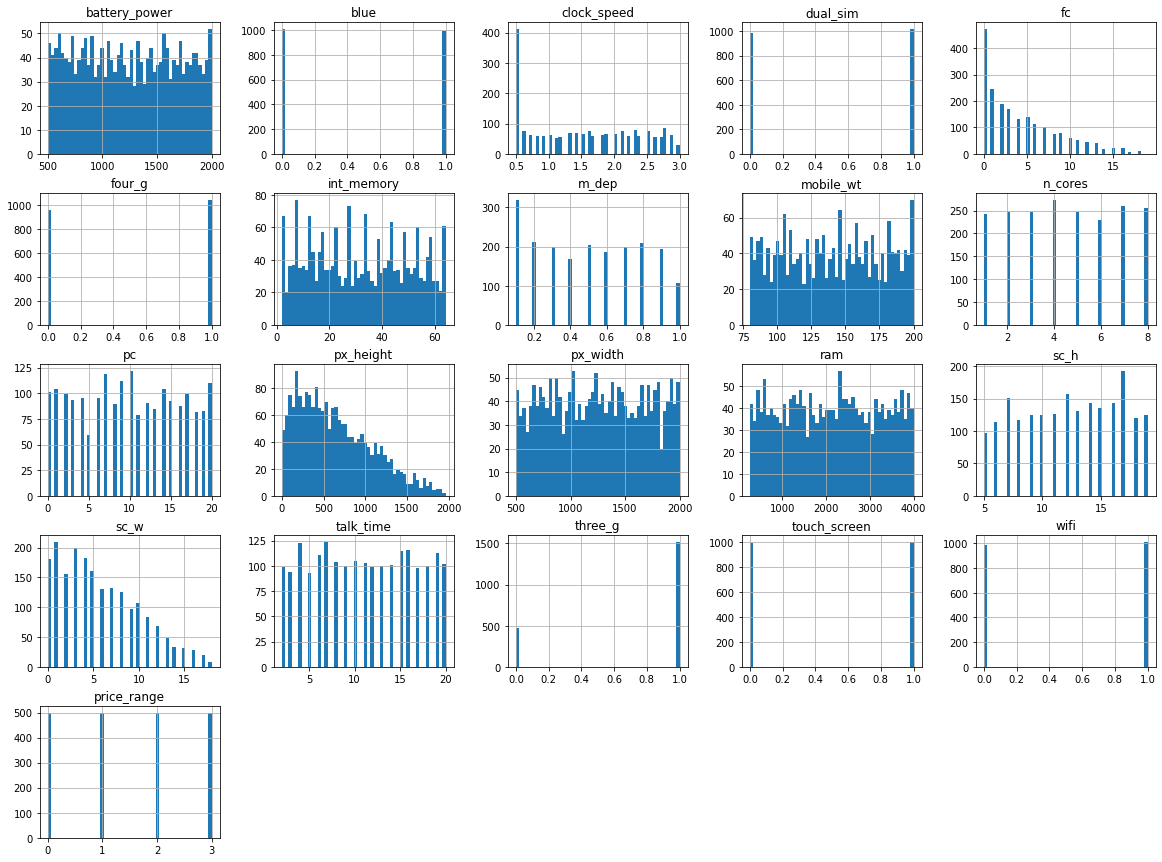

In [19]:
mobile.hist(bins=50, figsize=(20,15)) #To plot a histogram for each numerical attribute
plt.show()

<AxesSubplot:xlabel='battery_power', ylabel='price_range'>

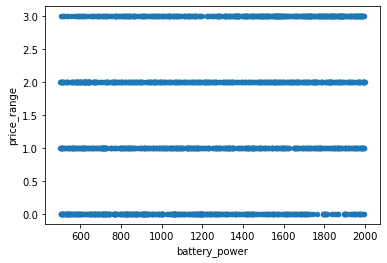

In [20]:
mobile.plot(kind="scatter", x="battery_power", y="price_range")

<AxesSubplot:xlabel='px_height', ylabel='px_width'>

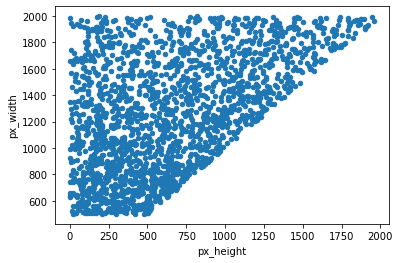

In [21]:
mobile.plot(kind="scatter", x="px_height", y="px_width")

<AxesSubplot:xlabel='talk_time', ylabel='mobile_wt'>

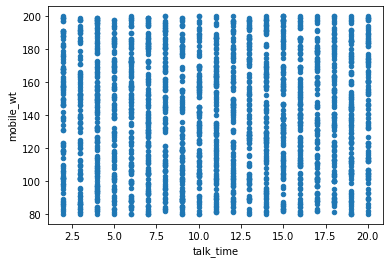

In [17]:
mobile.plot(kind="scatter", x="talk_time", y="mobile_wt")

<AxesSubplot:xlabel='ram', ylabel='price_range'>

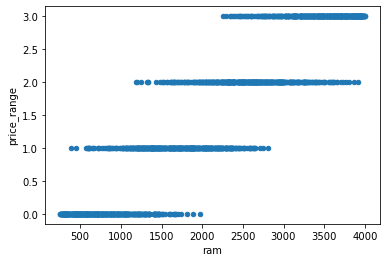

In [18]:
mobile.plot(kind="scatter", x="ram", y="price_range")

In [22]:
corr_matrix = mobile.corr() # Now we will look at the correlation of all the attributes with the expected class attribute (median-house-value)

In [24]:
corr_matrix["price_range"].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [25]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='price_range', ylabel='price_range'>,
        <AxesSubplot:xlabel='ram', ylabel='price_range'>,
        <AxesSubplot:xlabel='battery_power', ylabel='price_range'>,
        <AxesSubplot:xlabel='int_memory', ylabel='price_range'>],
       [<AxesSubplot:xlabel='price_range', ylabel='ram'>,
        <AxesSubplot:xlabel='ram', ylabel='ram'>,
        <AxesSubplot:xlabel='battery_power', ylabel='ram'>,
        <AxesSubplot:xlabel='int_memory', ylabel='ram'>],
       [<AxesSubplot:xlabel='price_range', ylabel='battery_power'>,
        <AxesSubplot:xlabel='ram', ylabel='battery_power'>,
        <AxesSubplot:xlabel='battery_power', ylabel='battery_power'>,
        <AxesSubplot:xlabel='int_memory', ylabel='battery_power'>],
       [<AxesSubplot:xlabel='price_range', ylabel='int_memory'>,
        <AxesSubplot:xlabel='ram', ylabel='int_memory'>,
        <AxesSubplot:xlabel='battery_power', ylabel='int_memory'>,
        <AxesSubplot:xlabel='int_memory', ylabel='int_memory'

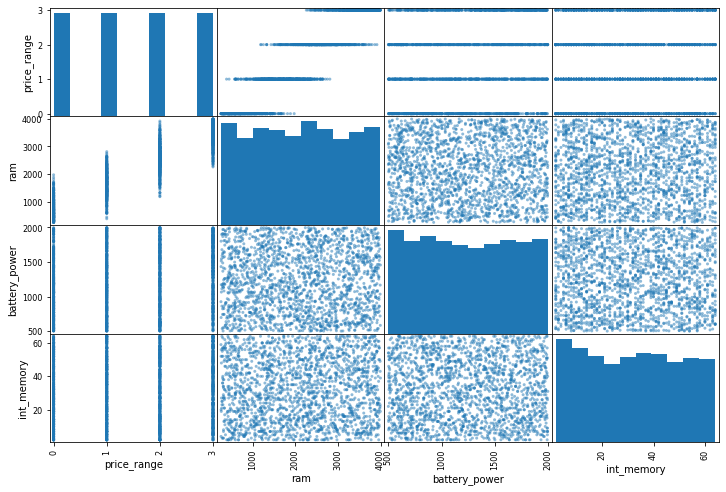

In [27]:
attributes = ["price_range", "ram", "battery_power",
              "int_memory"]
scatter_matrix(mobile[attributes], figsize=(12, 8))